In [1]:
## Import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
## Read "UniversalBank.csv" using pandas

UniversalBank = pd.read_csv("UniversalBank.csv")


In [3]:
## Drop columns which are not significant (Eg: ID,etc..)
UniversalBank=UniversalBank.drop(["ID","ZIP Code"],axis = 1)


In [4]:
## Convert Categorical Columns to Dummies using pandas
## Use columns and drop_first arguments
UniversalBank["Education"]=UniversalBank.Education.astype('category')

UniversalBank = pd.get_dummies(UniversalBank,columns = ["Education"],drop_first=True)


In [5]:
X = UniversalBank.drop("Personal Loan", axis=1)

In [6]:
## Split the data into X and y

Y = UniversalBank.loc[:,"Personal Loan"]
Y.head(7)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: Personal Loan, dtype: int64

In [7]:
## Split X and y into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 8)


In [8]:
## Print the shape of X_train, X_test, y_train, y_test

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(4000, 12)
(1000, 12)
(4000,)
(1000,)


In [9]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=50,n_jobs=2,oob_score=True)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [13]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = rfc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score 

In [17]:
accuracy_score(Y_test,y_pred)

0.99

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
rfc_grid = RandomForestClassifier(n_jobs=-1,max_features="sqrt")

In [30]:
param_grid = {
    "n_estimators":[9,18,27,36,45,54,63],
    "max_depth":[5,10],
    "min_samples_leaf":[2,4]
}

In [31]:
rfc_cv = GridSearchCV(estimator=rfc_grid,param_grid=param_grid,cv=5)

In [32]:
rfc_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(rfc_cv.best_score_,rfc_cv.best_params_)

0.98675 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 54}


In [47]:
Y_train.value_counts()/sum(Y_train.value_counts())

0    0.906
1    0.094
Name: Personal Loan, dtype: float64

In [36]:
rfc_weights = RandomForestClassifier(n_estimators=50,class_weight={0:0.1,1:0.9})

In [37]:
rfc_weights.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
y_pred1 = rfc_weights.predict(X_test)

In [39]:
accuracy_score(Y_test,y_pred1)

0.987

In [42]:
feat_imp = pd.Series(rfc_weights.feature_importances_,index = X_train.columns)

In [43]:
feat_ordered = feat_imp.nlargest(n = len(feat_imp))

In [44]:
import matplotlib as plt

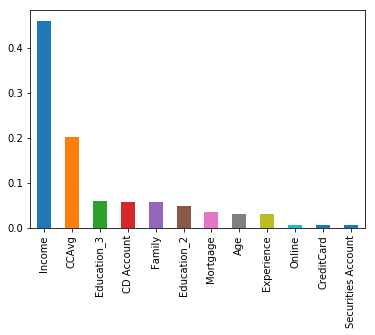

In [46]:
feat_ordered.plot(kind = "bar")